In [1]:
# Machine Learning Aspect of the Project  

Raw Data:
   Year  Grand Total
0  2020        35937
1  2021        50319
2  2022        67315
3  2023        91153
4  2024       105017


/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


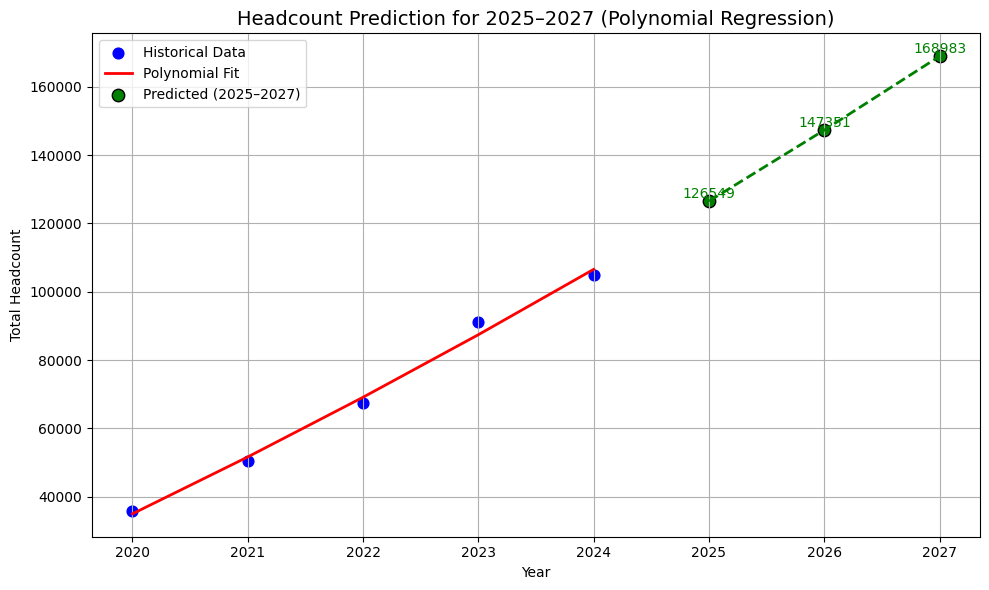

Forecasted Headcounts for 2025–2027:
   Year  Predicted Headcount
0  2025               126549
1  2026               147351
2  2027               168983
Saved to 'Polynomial_Regression_Headcount_2025_2027.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the Excel file
df = pd.read_excel(r"Yearly Headcount.xlsx", sheet_name="Sheet1")

# Display the 'Year' column numeric foormat for regression
print("Raw Data:") 
print(df.head())

# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'])
X = df[['Year']]
y = df['Grand Total']

# Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Forecast for 2025–2027
future_years = np.array(range(2025, 2028)).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Historical Data', s=60)
plt.plot(X, model.predict(X_poly), color='red', label='Polynomial Fit', linewidth=2)

plt.scatter(future_years, future_predictions, color='green', label='Predicted (2025–2027)', s=80, edgecolor='black')
plt.plot(future_years, future_predictions, color='green', linestyle='--', linewidth=2)

for year, prediction in zip(future_years.flatten(), future_predictions):
    plt.text(year, prediction, f'{int(prediction)}', fontsize=10, ha='center', va='bottom', color='green')

plt.title('Headcount Prediction for 2025–2027 (Polynomial Regression)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Headcount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecasted values
predicted_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Headcount': future_predictions.astype(int)
})
print("Forecasted Headcounts for 2025–2027:")
print(predicted_df)

# Save to CSV
predicted_df.to_csv("Polynomial_Regression_Headcount_2025_2027.csv", index=False)
print("Saved to 'Polynomial_Regression_Headcount_2025_2027.csv'")